# Python/pandas practice: load and clean a table

In [1]:
# Jupyter 'magic' commands: turn off autosave and show plots in the notebook
%autosave 0
%matplotlib inline

# Import the pandas package
import pandas as pd

Autosave disabled


## Load a CSV file as a `DataFrame`

A [pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a popular way to store a table in memory. Each column of a DataFrame is a [Series](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series) object.
 
Each DataFrame comes with built-in methods designed for [SQL-style data manipulation](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html).  
DataFrames have many of the same features as [data.frame objects in R](http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html).

Suneku comes with a few example CSV files in the `~/suneku/data/` folder.  
Note that a suneku lab can only see files inside your `~/suneku/` folder.  
From inside a lab, this folder will appear as `/suneku/` without the `~`.

In [2]:
INPUT_FILE = '/suneku/data/WaterSanitation.csv'
Data = pd.read_csv(INPUT_FILE)
Data.head()

,Unnamed: 0,Unnamed: 1,Population using improved drinking-water sources (%),Population using improved drinking-water sources (%).1,Population using improved drinking-water sources (%).2,Population using improved sanitation facilities (%),Population using improved sanitation facilities (%).1,Population using improved sanitation facilities (%).2
0,Country,Year,Rural,Urban,Total,Rural,Urban,Total
1,Afghanistan,2015,47.0,78.2,55.3,27.0,45.1,31.9
2,Afghanistan,2000,24.3,52.2,30.3,21.3,31.2,23.4
3,Albania,2015,95.2,94.9,95.1,90.2,95.5,93.2
4,Albania,2000,93.3,100.0,96.1,75.2,94.8,83.4


## Simplify column names
In the original file, column names are stored in a complicated way spread out across two rows.

In [3]:
# Make some simpler column names
col_names = [
    'Country',
    'Year',
    'WaterPctRural',
    'WaterPctUrban',
    'WaterPct',
    'SaniPctRural',
    'SaniPctUrban',
    'SaniPct']
Data.columns = col_names

# Delete row #0 from the table.
Data = Data.drop(0)

Data.head()

,Country,Year,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
1,Afghanistan,2015,47.0,78.2,55.3,27.0,45.1,31.9
2,Afghanistan,2000,24.3,52.2,30.3,21.3,31.2,23.4
3,Albania,2015,95.2,94.9,95.1,90.2,95.5,93.2
4,Albania,2000,93.3,100.0,96.1,75.2,94.8,83.4
5,Albania,1990,NaN,100.0,NaN,68.7,94.5,78.1


## Watch out for leading and trailing whitespace

In [4]:
# Beware of string data with hard-to-see whitespace characters
Data['Year'].unique()

array([' 2015', ' 2000', ' 1990'], dtype=object)

In [5]:
# Extra whitespace can cause confusing results
(Data['Year'] == '2015').any()

False

In [6]:
# Just to be safe, remove all leading and trailing whitespace in every column
for col in Data.columns:
    Data[col] = Data[col].str.strip()
Data['Year'].unique()

array(['2015', '2000', '1990'], dtype=object)

## Adjust column datatypes
`pd.read_csv()` tries to guess what type of data is in each column, but it can be wrong.  
Check the datatypes and change them if necessary.

In [7]:
# Looks like everything in this table is the generic 'object' type
Data.dtypes

Country          object
Year             object
WaterPctRural    object
WaterPctUrban    object
WaterPct         object
SaniPctRural     object
SaniPctUrban     object
SaniPct          object
dtype: object

In [8]:
# Convert 'Country' to a categorical.
# (This isn't absolutely necessary. It's also OK to leave it as a string.)
Data['Country'] = Data['Country'].astype('category')

# Convert 'Year' to datetime64
Data['Year'] = pd.to_datetime(Data['Year'],format='%Y')

# Convert numeric columns to floating-point numbers
numeric_cols = [ x for x in Data.columns if x not in ['Country','Year'] ]
for col in numeric_cols:
    Data[col] = pd.to_numeric(Data[col])

Data.dtypes

Country                category
Year             datetime64[ns]
WaterPctRural           float64
WaterPctUrban           float64
WaterPct                float64
SaniPctRural            float64
SaniPctUrban            float64
SaniPct                 float64
dtype: object

## Sort and filter a `DataFrame`

In [9]:
# Find 5 rows with lowest SaniPctTotal in 2015
f2015 = Data['Year']=='2015'
Data.loc[f2015].sort_values('SaniPct').head()

,Country,Year,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
464,South Sudan,2015-01-01,56.9,66.7,58.7,4.5,16.4,6.7
360,Niger,2015-01-01,48.6,100.0,58.2,4.6,37.9,10.9
499,Togo,2015-01-01,44.2,91.4,63.1,2.9,24.7,11.6
291,Madagascar,2015-01-01,35.3,81.6,51.5,8.7,18.0,12.0
97,Chad,2015-01-01,44.8,71.8,50.8,6.5,31.4,12.1


In [10]:
# Find countries with a perfect score in all categories in 1990
f1990 = Data['Year']=='1990'
fPerfect = (Data[numeric_cols] >= 100).any(axis=1)
Data.loc[f1990 & fPerfect,'Country']

5                                                Albania
11                                               Andorra
26                                             Australia
29                                               Austria
49                                               Belgium
73                                              Bulgaria
93                                                Canada
129                                               Cyprus
135                Democratic People's Republic of Korea
141                                              Denmark
176                                              Finland
179                                               France
190                                              Germany
223                                              Iceland
241                                               Israel
244                                                Italy
250                                                Japan
265                            

## Check for missing values
The `pandas` package is designed for [working with missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Here are a few examples.

In [11]:
# How many NaN's (or other null markers) are in each column?
Data.isnull().sum()

Country           0
Year              0
WaterPctRural    27
WaterPctUrban     5
WaterPct         19
SaniPctRural     39
SaniPctUrban     23
SaniPct          33
dtype: int64

In [12]:
# Show the first few rows which have at least one null value
fBadRow = Data.isnull().any(axis=1)
Data.loc[fBadRow].head()

,Country,Year,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
5,Albania,1990-01-01,NaN,100.0,NaN,68.7,94.5,78.1
15,Antigua and Barbuda,2015-01-01,97.9,97.9,97.9,NaN,NaN,NaN
23,Armenia,1990-01-01,NaN,98.1,NaN,NaN,95.1,NaN
32,Azerbaijan,1990-01-01,50.3,85.4,69.1,NaN,NaN,NaN
64,Bosnia and Herzegovina,1990-01-01,95.7,99.3,97.1,NaN,98.3,NaN


## Use `groupby()` to operate on chunks of a `DataFrame`

`DataFrame.groupby()` is used for [split-apply-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html) operations. It is similar to:

* `GROUP BY` in SQL
* `groupBy` in Apache Spark
* `accumarray()` in MATLAB

In [13]:
# Find the mean of each column for each year
Data.groupby('Year').mean()

,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
Year,,,,,,
1990-01-01,71.579755,91.713143,79.393939,55.735948,75.101235,64.173856
2000-01-01,75.210638,92.020942,82.521990,59.793583,75.366316,66.941579
2015-01-01,84.139444,95.176471,89.191257,66.876536,79.102186,72.980769


In [14]:
# Find the median of each column for each year
Data.groupby('Year').median()

,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
Year,,,,,,
1990-01-01,74.70,95.9,88.2,59.1,85.70,73.10
2000-01-01,79.05,95.9,89.9,67.2,83.75,79.25
2015-01-01,92.20,98.2,95.7,80.7,89.10,86.15


In [15]:
# For each country, find the lowest 'WaterPct' value.
# Show the lowest 10 values in the resulting Series.
Data.groupby('Country')['WaterPct'].min().sort_values().head(10)

Country
Ethiopia            13.2
Cambodia            23.4
Somalia             23.5
Mali                27.1
Mauritania          29.1
Madagascar          29.5
Afghanistan         30.3
Niger               33.7
Papua New Guinea    33.8
Mozambique          35.1
Name: WaterPct, dtype: float64

## Set index columns
You can declare one or more columns to be the [Index](http://pandas.pydata.org/pandas-docs/stable/indexing.html) of a DataFrame.  
Index columns allow you to access rows by name, not just by row number.  

In [16]:
Data = Data.set_index(['Country','Year']).sort_index()
Data.head()

WaterPctRural  WaterPctUrban  WaterPct  SaniPctRural  \
Country     Year                                                               
Afghanistan 2000-01-01           24.3           52.2      30.3          21.3   
            2015-01-01           47.0           78.2      55.3          27.0   
Albania     1990-01-01            NaN          100.0       NaN          68.7   
            2000-01-01           93.3          100.0      96.1          75.2   
            2015-01-01           95.2           94.9      95.1          90.2   

                        SaniPctUrban  SaniPct  
Country     Year                               
Afghanistan 2000-01-01          31.2     23.4  
            2015-01-01          45.1     31.9  
Albania     1990-01-01          94.5     78.1  
            2000-01-01          94.8     83.4  
            2015-01-01          95.5     93.2

In [17]:
# Look up all rows with a specific country name
Data.loc['United States of America']

,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
Year,,,,,,
1990-01-01,94.0,99.8,98.4,98.6,99.8,99.5
2000-01-01,95.8,99.6,98.8,99.2,99.9,99.7
2015-01-01,98.2,99.4,99.2,100.0,100.0,100.0


In [18]:
# Does each (Country,Year) have at most one row, or are some duplicated?
print( Data.index.is_unique )
fDuplicate = Data.index.duplicated()
Data.loc[fDuplicate]

True


,,WaterPctRural,WaterPctUrban,WaterPct,SaniPctRural,SaniPctUrban,SaniPct
Country,Year,,,,,,


In [19]:
# Convert index columns back to regular columns
Data = Data.reset_index()

## Make some plots
See the [pandas visualization docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html) for more examples.  
Each suneku lab also comes pre-loaded with the [seaborn](https://seaborn.pydata.org/) library and a custom [sunekutools.viz](https://github.com/samkennerly/suneku/blob/master/sunekutools/viz/viz.ipynb) module for plotting.

Histogram of each numeric column


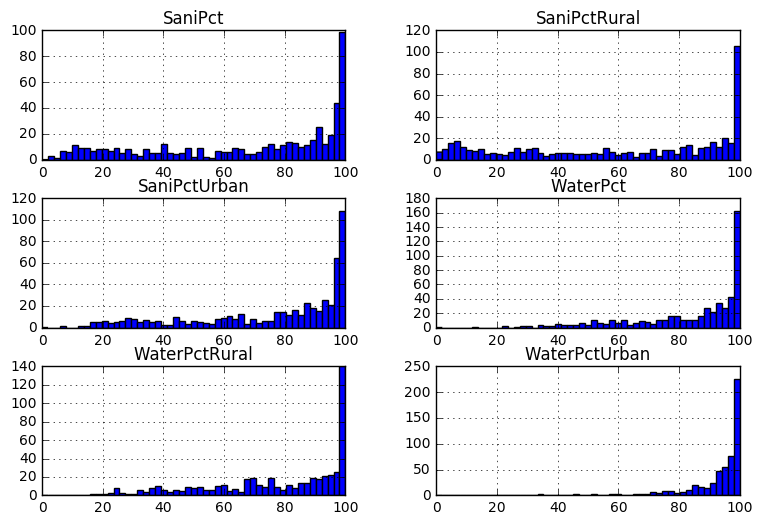

In [20]:
# Before doing any math, I like to plot histograms of numeric columns
Data.hist(bins=51,figsize=(9,6),range=[0,100])
print("Histogram of each numeric column")

Urban percent minus Rural percent


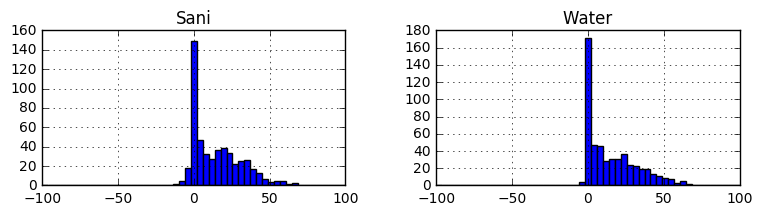

In [21]:
# Are urban areas usually better or worse off than rural areas?
UrbanVsRural = pd.DataFrame(index=Data.index)
UrbanVsRural['Sani'] = Data['SaniPctUrban'] - Data['SaniPctRural']
UrbanVsRural['Water'] = Data['WaterPctUrban'] - Data['WaterPctRural']
UrbanVsRural.hist(bins=51,range=[-100,100],figsize=(9,2))
print("Urban percent minus Rural percent")